# basic plot of ADCIRC max water level for NSF-HSEES
##Ensemble member number is set in "ens", and can be iterated over to load all ensemble members.  Note that the ADCIRC grid does not change between ensemble members, and so the part that gets the lon, lat, elements can be done once.  

## exercise:  make a plot (template below) of the MOM for this Experiment.  I.e., the max across all maxes for the ensembles 1-21.

In [1]:
from pylab import *

import matplotlib.tri as Tri
import netCDF4
import datetime
import time
import sys
%matplotlib inline

In [46]:
#  this is the THREDDS url to the Isabel Experiment #1, ensemble 01.  
ens=10
url_base='http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n%02d/maxele.63.nc'
url=url_base % ens


In [51]:
# get ADCIRC grid parts;  this need ony be done once, as it can be tome-comsuming over the network
nc=netCDF4.Dataset(url)
print nc.variables.keys()
lon = nc.variables['x'][:]
lat = nc.variables['y'][:]
nv = nc.variables['element'][:,:] -1
tri = Tri.Triangulation(lon,lat, triangles=nv)
latmin = np.mean(lat)  # needed for scaling lon/lat plots


[u'time', u'x', u'y', u'element', u'adcirc_mesh', u'neta', u'nvdll', u'max_nvdll', u'ibtypee', u'nbdv', u'nvel', u'nvell', u'max_nvell', u'ibtype', u'nbvv', u'depth', u'zeta_max', u'time_of_zeta_max']
var_d[0]: 0.0


In [52]:
# This gets the data associated with the variable;  this part should be looped over to load the sequence of ensembles; 
# this means looping over ens=1:21 and building the url each time.
vname='zeta_max'
var = nc.variables[vname]
var_d=var[:]
print "var_d[0]: " + str(var_d[0])

var_d[0]: 0.0


Making contours in figure ...
Calling tricontourf  ...


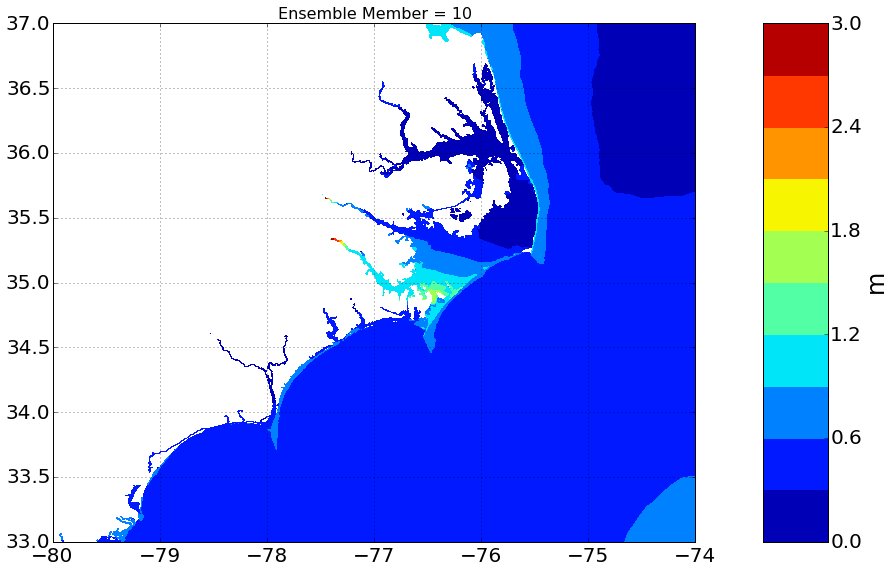

In [54]:
print 'Making contours in figure ...'
fig = plt.figure(figsize=(18,9), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax.set_aspect(1.0/np.cos(latmin * np.pi / 180.0))

print 'Calling tricontourf  ...'
vmax=3.
levels = linspace(0.,np.ceil(vmax),11)
print levels
contour = tricontourf(tri, var_d,levels=levels,shading='faceted')
plt.grid(True)
plt.xlim((-80,-74))
plt.ylim((33,37))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Ensemble Member = %02d' % ens, fontsize=16)

# add colorbar
cbax = fig.add_axes([0.80, 0.1, 0.05, 0.8]) 
cb = plt.colorbar(contour, cax=cbax,  orientation='vertical')
cb.set_label(var.units, fontsize=24)
cb.ax.tick_params(axis='both', which='major', labelsize=20)